# Logistic Regression 2

**=================================================================================================================**

## Project Description

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Summary

## Recommendation for Action

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify


# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

# import shap
# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

import imblearn

from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


import feature_engine

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures 
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection
from feature_engine.selection import SelectBySingleFeaturePerformance

import pycaret
from pycaret.classification import *

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Quick Data Glance

In [2]:
df = pd.read_csv("calibdata2.csv")

In [3]:
df.head()

,annualinc,collections,delinq,inq,openacc,dti,pubrec,individual,mortgage,rent,own,other,term60mths,vstatusverified,vstatusnotverified,lstatus
0,0.02,0.00,0.00,0.06,0.47,0.59,0.00,1,1,0,0,0,1,1,0,0
1,0.00,0.00,0.00,0.00,0.12,0.57,0.00,1,0,1,0,0,0,0,1,0
2,0.01,0.00,0.00,0.03,0.16,0.34,0.00,1,0,1,0,0,0,1,0,0
3,0.00,0.00,0.00,0.00,0.18,0.21,0.00,1,1,0,0,0,0,0,1,0
4,0.01,0.00,0.00,0.00,0.30,0.59,0.00,1,0,1,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49986 entries, 0 to 49985
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   annualinc           49986 non-null  float64
 1   collections         49986 non-null  float64
 2   delinq              49986 non-null  float64
 3   inq                 49986 non-null  float64
 4   openacc             49986 non-null  float64
 5   dti                 49986 non-null  float64
 6   pubrec              49986 non-null  float64
 7   individual          49986 non-null  int64  
 8   mortgage            49986 non-null  int64  
 9   rent                49986 non-null  int64  
 10  own                 49986 non-null  int64  
 11  other               49986 non-null  int64  
 12  term60mths          49986 non-null  int64  
 13  vstatusverified     49986 non-null  int64  
 14  vstatusnotverified  49986 non-null  int64  
 15  lstatus             49986 non-null  int64  
dtypes: f

In [5]:
df.dtypes.value_counts()

int64      9
float64    7
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,annualinc,collections,delinq,inq,openacc,dti,pubrec,individual,mortgage,rent,own,other,term60mths,vstatusverified,vstatusnotverified,lstatus
count,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00
mean,0.01,0.00,0.01,0.02,0.19,0.45,0.00,1.00,0.50,0.40,0.10,0.00,0.30,0.38,0.32,0.07
std,0.01,0.03,0.03,0.03,0.09,0.21,0.01,0.02,0.50,0.49,0.29,0.01,0.46,0.48,0.46,0.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.12,0.30,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.01,0.00,0.00,0.00,0.18,0.44,0.00,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.01,0.00,0.00,0.03,0.23,0.59,0.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [7]:
df.lstatus.value_counts(normalize=True)

0   0.93
1   0.07
Name: lstatus, dtype: float64

In [8]:
df.shape

(49986, 16)

In [9]:
df.columns

Index(['annualinc', 'collections', 'delinq', 'inq', 'openacc', 'dti', 'pubrec', 'individual', 'mortgage', 'rent', 'own', 'other', 'term60mths', 'vstatusverified', 'vstatusnotverified', 'lstatus'], dtype='object')

**==================================================================================================================**

## Create a small dataset

In [10]:
df = df.sample(frac=0.25)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.head()

,annualinc,collections,delinq,inq,openacc,dti,pubrec,individual,mortgage,rent,own,other,term60mths,vstatusverified,vstatusnotverified,lstatus
0,0.01,0.00,0.00,0.00,0.11,0.42,0.00,1,1,0,0,0,0,0,0,0
1,0.01,0.00,0.00,0.03,0.19,0.40,0.00,1,0,1,0,0,0,0,1,0
2,0.01,0.00,0.00,0.00,0.19,0.51,0.00,1,0,1,0,0,0,0,1,0
3,0.01,0.00,0.00,0.00,0.12,0.44,0.00,1,1,0,0,0,0,0,0,0
4,0.01,0.00,0.00,0.03,0.16,0.30,0.00,1,0,1,0,0,1,1,0,0


In [13]:
df.shape

(12496, 16)

In [14]:
df.lstatus.value_counts(normalize=True)

0   0.93
1   0.07
Name: lstatus, dtype: float64

**==================================================================================================================**

**==================================================================================================================**

## Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.



In [15]:
df.shape

(12496, 16)

In [16]:
X = df.iloc[:,0:15]
y = df.iloc[:,15]

In [17]:
Counter(y)

Counter({0: 11619, 1: 877})

In [18]:
X.values, y.values

(array([[0.00533527, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00751789, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.00897296, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.01091306, 0.        , 0.        , ..., 1.        , 1.        ,
         0.        ],
        [0.01321693, 0.        , 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.0077604 , 0.        , 0.03703704, ..., 1.        , 0.        ,
         0.        ]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9996, 15), (2500, 15), (9996,), (2500,))

In [21]:
Counter(y_train), Counter(y_test)

(Counter({0: 9294, 1: 702}), Counter({0: 2325, 1: 175}))

**==================================================================================================================**

# Filter Methods (Other Methods)

## Univariate Performance with Feature-engine

This procedure works as follows:

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

The C value in Logistic Regression is an user adjustable parameter that controls regularisation. In simple terms, higher values of C will instruct our model to fit the training set as best as possible, while lower C values will favour a simple models with coefficients closer to zero.


In [28]:
# set up the machine learning model
lr = LogisticRegression(penalty='l2', C=1000, random_state=0, solver='lbfgs', max_iter=1000)

In [34]:
# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=lr,
    scoring="roc_auc",
    cv=5,
    threshold=0.55
)

In [35]:
# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(cv=5,
                                 estimator=LogisticRegression(C=1000,
                                                              max_iter=1000,
                                                              random_state=0),
                                 threshold=0.55)

In [36]:
# the transformer stores a dictionary of feature:metric pairs
# notice that the roc can be positive or negative.
# the selector selects based on the absolute value

#In general, an AUC of 0.5 suggests no discrimination 
#(i.e., ability to diagnose patients with and without the disease or condition based on the test), 
#0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

sel.feature_performance_

{'annualinc': 0.576822940313442,
 'collections': 0.49705241816274925,
 'delinq': 0.5073993420109036,
 'inq': 0.580084731536066,
 'openacc': 0.5099585489358384,
 'dti': 0.5278410033828458,
 'pubrec': 0.5107032941114253,
 'individual': 0.5004841312533621,
 'mortgage': 0.5309005216118967,
 'rent': 0.529171428991361,
 'own': 0.4982371998978737,
 'other': 0.5,
 'term60mths': 0.5346063947286774,
 'vstatusverified': 0.5292979290195733,
 'vstatusnotverified': 0.5090316226777127}

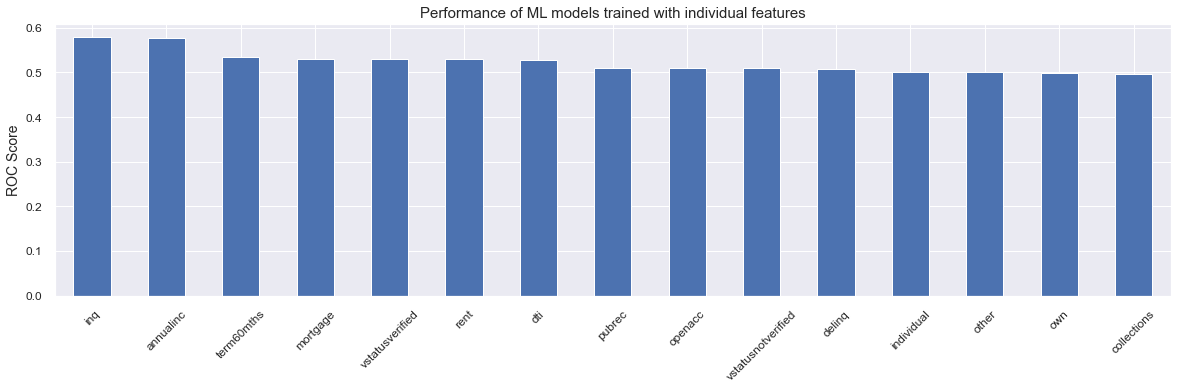

In [37]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features', size=15)
plt.xticks(rotation=45)
plt.ylabel('ROC Score')
plt.show()

In [38]:
# the features that will be removed

sel.features_to_drop_

['collections',
 'delinq',
 'openacc',
 'dti',
 'pubrec',
 'individual',
 'mortgage',
 'rent',
 'own',
 'other',
 'term60mths',
 'vstatusverified',
 'vstatusnotverified']

In [39]:
# select features in the dataframes

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [40]:
X_train.shape, X_test.shape

((9996, 2), (2500, 2))

In [41]:
X_train.columns

Index(['annualinc', 'inq'], dtype='object')

**==================================================================================================================**

**=================================================================================================================**

# Class Imbalance Treatment

For many machine learning tasks on imbalanced datasets, like this credit card fraud detection, we normally care more about recall than precision. As a baseline, we want the model to be able to find all frauds and we would allow the model to make false-positive errors because the cost of false positives is usually not very high (maybe just costs a false notification email or phone call to confirm with customers). On the other hand, failing to recognize positive examples (such as fraud or a deadly disease) can be life-threatening 

As such, our priority is to improve the model's recall, then we will also want to keep precision as high as possible.

## Class reweighting

For binary classification models, its loss function is normally calculated via a sum of the loss with respect to class 0 and the loss with respect to class 1. By default, their class weights are all 1s meaning we treat each class equally important.

However, since the class distribution is skewed in imbalanced datasets and the loss function optimization process will be dominated by the majority class, we want to help the minority class by increasing its class weight in the loss function.

Class weights can be generally calculated via the following three strategies:

- Based on their instances portion in the dataset. For example, if positive instances only take 10% of the dataset, we assign its weight to be 0.9 and weight for the majority class to be 0.1
- Heuristics or domain knowledge. Misclassification normally has different costs per class, for example, the cost of failure to diagnose a disease is much higher than a false positive diagnose. If we already know such misclassification costs beforehand, we may use them to assign class weights
- Hyper-parameter tuning. Standard hyper-parameter tuning methods can be used to find optimized class weights. For example, grid searching from 0.1 to 0.9 for positive class weight to find out which hyperparameter combination generates the best model.


In [42]:
class_weight = {}

# Assign weight of class 0 to be 0.1
class_weight[0] = 0.1

# Assign weight of class 1 to be 0.9
class_weight[1] = 0.9

In [43]:
# Define a logistic regression with weight
logregw = LogisticRegression(random_state=0, 
                              max_iter = 1000,
                              class_weight=class_weight,
                              C=1.0)

In [44]:
# Train the model
logregw.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=1000, random_state=0)

In [45]:
# Make predictions on the test dataset
logregw_pred = logregw.predict(X_test)

In [46]:
logregw_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, logregw_pred))
print("Precision:", "%.3f" % precision_score(y_test, logregw_pred))
print("Recall:", "%.3f" % recall_score(y_test, logregw_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, logregw_pred))
print("ROC-AUC Score:", "%.3f" % roc_auc_score(y_test, logregw_pred))

Accuracy: 0.930
Precision: 0.333
Recall: 0.006
F1 Score: 0.011
ROC-AUC Score: 0.502


## Logistic Regression (Scikit Learn)

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.

# Hyperparameter Tuning

## RandomSearchCV

Randomised grid search is very useful in finding near-optimal hyper parameters for any machine learning models.

Rules of thumb: with 60 iterations, 95% of the time, best 5% sets of parameters can be found, regardless of grid size.

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
parameters = { 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
               'C':  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }

In [ ]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
lr_randm = RandomizedSearchCV(estimator=logreg, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring=scoring, refit='roc_auc')

In [ ]:
%%time
lr_randm.fit(X_random_train, y_random_train)

In [ ]:
lr_randm.best_estimator_

In [ ]:
lr_randm.best_score_

In [ ]:
lr_randm.best_params_

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'roc_auc' : 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        'ROC-AUC' : roc_auc
                        },
                        ignore_index=True
                       )
  
    return table

In [ ]:
# Get all CV scores
lr_cv_results = make_results('Logistic Regression', lr_randm, 'roc_auc')
lr_cv_results

### Logistic Regression model

In [ ]:
logreg = LogisticRegression( penalty='l1', C=0.1, max_iter=1000, random_state=0, solver='liblinear')

In [ ]:
logreg.fit(X_train,y_train)

In [ ]:
logreg_pred = logreg.predict(X_test)

In [ ]:
logreg_pred[0:5]

In [ ]:
logreg.coef_

In [ ]:
logreg.intercept_

In [ ]:
logreg.score(X_train, y_train)

In [ ]:
logreg.score(X_test, y_test)

### Logistic Model Evaluation

In [ ]:
print(classification_report(y_test,logreg_pred))

In [ ]:
cm = confusion_matrix(y_test,logreg_pred)
cm

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=logreg, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=logreg, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Estimate the generalization error of a machine learning model using Cross-Validation Schemes

In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
# estimate generalization error
clf = cross_validate(estimator=logregl1,
                    X=X_train,
                    y=y_train,
                    scoring='roc_auc',
                    return_train_score=True,
                    cv=kf)

In [ ]:
# mean test set roc-auc
clf["test_score"].mean()

In [ ]:
# mean train set roc-auc
clf["train_score"].mean()

In [ ]:
lrtable = pd.DataFrame()
lrtable = table.append({'Model': "Logistic Regression",
                        'F1':  f1_score(y_test, logreg_pred),
                        'Recall': recall_score(y_test, logreg_pred),
                        'Precision': precision_score(y_test, logreg_pred),
                        'Accuracy': accuracy_score(y_test, logreg_pred),
                        'ROC-AUC': roc_auc_score(y_test, logreg_pred)
                      },
                        ignore_index=True)
                     
lrtable

**==================================================================================================================**

In [ ]:
# L1 regularized logistic regression
logregl1 = LogisticRegression(penalty='l1', C=1.0, 
                              solver='liblinear', class_weight=None,
                              max_iter=1000, random_state=0)

In [ ]:
logregl1.fit(X_train,y_train)

In [ ]:
logregl1_pred = logregl1.predict(X_test)

In [ ]:
logregl1_pred[0:5]

In [ ]:
logregl1.coef_

In [ ]:
logregl1.intercept_

In [ ]:
logregl1.score(X_train, y_train)

In [ ]:
logregl1.score(X_test, y_test)

**==================================================================================================================**

In [ ]:
# L2 regularized logistic regression
logregl2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=500, random_state=0)

In [ ]:
logregl2.fit(X_train,y_train)

In [ ]:
logregl2_pred = logregl2.predict(X_test)

In [ ]:
logregl2_pred[0:5]

In [ ]:
logregl2.coef_

In [ ]:
logregl2.intercept_

In [ ]:
logregl2.score(X_train, y_train)

In [ ]:
logregl2.score(X_test, y_test)

### Find best C value

In [ ]:
training_accuracy = []
test_accuracy = []

# try c values from 0.001 to 100:
c_settings = np.arange(0.001, 100, 0.1) 
for i in c_settings:
    # build the model
    clf = LogisticRegression(C=i)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(c_settings, training_accuracy, label="training accuracy")
plt.plot(c_settings, test_accuracy, label="test accuracy")
plt.legend()

### Logistic Model Evaluation

To determine which evaluation metric might be best, consider how our model might be wrong. There are two possibilities for bad predictions: 
  
  - **False positives:** When the model predicts a customer **will** churn when in fact they won't
  - **False negatives:** When the model predicts a customer will **not** churn when in fact they will     

As you know, there are a number of performance metrics aside from accuracy to choose from. Some of these include precision, recall, and F1 score. Let's examine these more closely, beginning with _precision_:

$$precision = \frac{\text{TP}}{\text{FP+TP}}$$
  </br> 

And _recall_: 

$$recall = \frac{\text{TP}}{\text{FN+TP}}$$  
  </br>

<img src = "confusion matrix.png">

Precision represents the percentage of all our model's predicted positives that are true positives. This might not be the best metric for us to use, because it disincentivizes predicting someone will churn unless there is a high degree of certainty that they will. This could translate to a high rate of false negatives.

On the other hand, recall represents the percentage of all actual positives that the model identifies as such. This also might not be the best metric to use, because it rewards predicting someone will churn even if the likelihood of their doing so is very small. This could translate to a high rate of false positives.

So which is worse, false positives or false negatives? Well, we'd first have to define what _worse_ means. This is dependent on the details of the project that you're working on. For the sake of this exercise, let us suppose that we're defining it as the error that would cost the bank more money.

Since we don't know the exact cost of predicting a false negative, we'll make an assumption for this exercise. We'll assume that a metric that balances precision and recall is best. The metric that helps us achieve this balance is _F1 score_, which is defined as the harmonic mean of precision and recall. 

$${F_{1}} = 2 \cdot \frac{precision \cdot  recall}{precision + recall}$$  
</br>
Again, there are many metrics to choose from. The important thing is that you make an informed decision that is based on your use case.

**Question:** What are the four basic parameters for evaluating the performance of a classification model?

1. True positives (TP): These are correctly predicted positive values, which means the value of actual and predicted classes are positive. 

2. True negatives (TN): These are correctly predicted negative values, which means the value of the actual and predicted classes are negative.

3. False positives (FP): This occurs when the value of the actual class is negative and the value of the predicted class is positive.

4. False negatives (FN): This occurs when the value of the actual class is positive and the value of the predicted class in negative. 

**Reminder:** When fitting and tuning classification modeld, data professioals aim to minimize false positives and false negatives.

**Question:**  What do the four scores demonstrate about your model, and how do you calculate them?

- Accuracy (TP+TN/TP+FP+FN+TN): The ratio of correctly predicted observations to total observations. 
 
- Precision (TP/TP+FP): The ratio of correctly predicted positive observations to total predicted positive observations. 

- Recall (Sensitivity, TP/TP+FN): The ratio of correctly predicted positive observations to all observations in actual class.

- F1 score: The harmonic average of precision and recall, which takes into account both false positives and false negatives. 

In [ ]:
print(classification_report(y_test,logregl1_pred))

In [ ]:
cm = confusion_matrix(y_test,logregl1_pred)
cm

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=logregl1, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=logregl1, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Jaccard index

Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [ ]:
jaccard_score(y_test, logpred , pos_label=0)

### Log Loss

Now, let's try **log loss** for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss(Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [ ]:
logproba = logreg.predict_proba(X_test)

In [ ]:
log_loss(y_test, logproba)

### Analyze the results

Print out the model's accuracy, precision, recall, and F1 score.

In [ ]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, logregl1_pred))
print("Precision:", "%.3f" % precision_score(y_test, logregl1_pred))
print("Recall:", "%.3f" % recall_score(y_test, logregl1_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, logregl1_pred))
print("ROC-AUC Score:", "%.3f" % roc_auc_score(y_test, logregl1_pred))

In [ ]:
table = pd.DataFrame()
table = table.append({'Model': "Logistic Regression",
                        'F1':  f1_score(y_test, logregl1_pred),
                        'Recall': recall_score(y_test, logregl1_pred),
                        'Precision': precision_score(y_test, logregl1_pred),
                        'Accuracy': accuracy_score(y_test, logregl1_pred),
                        'ROC-AUC': roc_auc_score(y_test, logregl1_pred)
                      },
                        ignore_index=True)
                     
table

**=================================================================================================================**

**=================================================================================================================**

## Cross-Validation

When performing supervised machine learning analysis, it is common to withhold a portion of the data to test the final model's performance. This model testing is performed on the 'unseen' data, which the model was not trained on. This withholding of a portion of the dataset for testing is called Cross-Validation. Cross-Validation can also be used to select hyper-parameters and test the final model. In this section, we will focus on the test data only.

Cross-Validation also helps avoid over-fitting; a complex model could repeat the labels of the samples that it has just seen and, therefore, would have a perfect score but would fail to predict anything useful on the 'unseen' data. Furthermore, a complex model could just be modeling noise.

Cross validation method involves dividing the dataset into 3 parts:

*   training set - is a portion of the data used for training the model
*   validation set - is a portion of the data used to optimize the hyper-parameters of the model. This will     be illustrated in the next lab
*   test set - is a portion of the data used to evaluate if the model generalizes enough to work on the     
    data it was not trained on   
    
`Scikit Learn` library contains many methods that can perform the splitting of the data into training, testing and validation sets. The most popular methods that we will cover in this Jupyter Notebook are:

*   train_test_split - creates a single split into train and test sets
*   K-fold - creates number of k-fold splits, allowing cross validation
*   cross_val_score - evaluates model's score through cross validation

[`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork783-2023-01-01) is a function that does K-fold cross validation for us, appropriately fitting and transforming at every step of the way.

Note that `cross_val_predict` doesn't use the same model for all steps; the predictions for each row are made when that row is in the validation set. We really have the collected results of 3 (i.e. `kf.num_splits`) different models. 

When we are done, `estimator` is still not fitted. If we want to predict on _new_ data, we still have to train our `estimator`.

### K Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation, as shown in the Diagram below. In this case, we would use K-1 (or 4 folds) for testing a 1 fold for training. K-fold is also used for hyper-parameters selection that we will discuss later.

<img src="k-fold.png">
<img src = "cross_validation_diagram.png">

In many cases, we would like to train models that are not available in Scikit-learn or are too large to fit in the memory. We can create a `KFold` object that  Provides train/test indices to split data into train/test sets in an iterative manner.

`n_splits`:  A number of folds. Must be at least 2. Changed in version 0.22: n_splits default value changed from 3 to 5.

`shuffle`: Indicates whether to shuffle the data before splitting into batches. Note, the samples within each split will not be shuffled.

`random_state`: the random state.

### Estimate the generalization error of a machine learning model using Cross-Validation Schemes

In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
# estimate generalization error
clf = cross_validate(estimator=logregl1,
                    X=X_train,
                    y=y_train,
                    scoring='roc_auc',
                    return_train_score=True,
                    cv=kf)

In [ ]:
# mean test set roc-auc
clf["test_score"].mean()

In [ ]:
# mean train set roc-auc
clf["train_score"].mean()

## Cross Validation Score

Now, let's use *Scikit-Learn's* *K-fold cross-validation* method to see whether we can assess the performance of our model. The *K-fold cross-validation* method splits the training set into the number of folds (n_splits), as now in the Diagram above, if we have K folds, K-1 is used for training and one fold is used for testing. The input parameters are as follows:

<b>estimator</b>: The object to use to `fit` the data.

<b>X</b>: array-like of shape (n_samples, n_features). The data to fit. Can be for example a list, or an array.

<b>y</b>: array-like of shape (n_samples,) or (n_samples, n_outputs), default=None. The target variable to try to predict in the case of supervised learning.

<b>scoring</b>: A str or a scorer callable object/ function with signature scorer (estimator, X, y) which should return only a single value.  See model evaluation [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01#scoring-parameter) for more information.

The larger the fold, the better the model performance is, as we are using more samples for training; the variance also decreases.


In [ ]:
#cv = cross_val_score(estimator=logreg, X=X_train, y=y_train, scoring='accuracy', cv=5)

In [ ]:
#cv = cross_val_score(estimator=logreg, X=X_train, y=y_train, scoring='f1', cv=5)

In [ ]:
#cv.mean()

In [ ]:
#cv.std()

In [ ]:
#-1 * cv

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

In [ ]:
#logreg_pred_cv = cross_val_predict(estimator=logreg, X=X_train[["disp"]], y=y_train, cv=5)

In [ ]:
#logreg_pred_cv [0:5]

**=================================================================================================================**

# Cross-validated hyperparameter tuning

Cross-validating a model using GridSearchCV can be done in a number of different ways. If you find notebooks online that other people have written, you'll likely soon discover this for yourself. But all variations must fulfill the same general requirements. (Refer to the [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) for further reading.)

The format presented below is step-wise, making it easier to follow.

* Create a dictionary of hyperparameters to search over:

  - key = name of hyperparameter (string)
  - value = values to search over (list)
  
* Create a dictionary of scoring metrics to capture. These metrics can be selected from scikit-learn's [built-in options](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) or custom-defined. For this exercise, we'll capture accuracy, precision, recall, and F1 score so we can examine all of them. The metrics are entered as strings.

* Instantiate the classifier (and set the `random_state`)

* Instantiate the `GridSearchCV` object. Pass as arguments:
  - The classifier (`tuned_decision_tree`)
  - The dictionary of hyperparameters to search over (`tree_para`)
  - The dictionary of scoring metrics (`scoring`)
  - The number of cross-validation folds you want (`cv=5`)
  - The scoring metric that you want GridSearch to use when it selects the "best" model (i.e., the model that performs best on average over all validation folds) (`refit='f1'`*)

    \* The reason it's called `refit` is because once the algorithm finds the combination of hyperparameters that results in the best average score across all validation folds, it will then refit this model to _all_ of the training data. Remember, up until now, with a 5-fold cross-validation, the model has only ever been fit on 80% (4/5) of the training data, because the remaining 20% was held out as a validation fold.

* Fit the data (`X_train`, `y_train`) to the `GridSearchCV` object (`clf`)

Depending on the number of different hyperparameters you choose, the number of combinations you search over, the size of your data, and your available computing resources, this could take a long time.

Now that the model is fit and cross-validated, we can use the `best_estimator_` attribute to inspect the hyperparameter values that yielded the highest F1 score during cross-validation.

The `best_score_` attribute returns the best average F1 score across the different folds among all the combinations of hyperparameters. Note that if we had set `refit='recall'` when we instantiated our `GridSearchCV` object earlier, then calling `best_score_` would return the best recall score, and the best parameters might not be the same as what they are in the above cell, because the model would be selected based on a different metric.

**=================================================================================================================**

## Grid Search CV

In [ ]:
# set up the model
logreg = LogisticRegression(penalty='l1', C=1.0, 
                              solver='liblinear', class_weight=None,
                              max_iter=1000, random_state=0)

In [ ]:
# determine the hyperparameter space
param_grid = dict(
    class_weight=[{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}, {0:0.3, 1:0.6}],
        )

In [ ]:
param_grid

In [ ]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
# set up the search (one score)
gs1 = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='roc_auc', 
                  n_jobs=2, refit=True, cv=5, return_train_score=True)

In [ ]:
# set up the search (multiple scores)
gs2 = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring=scoring, 
                  n_jobs=2, refit='roc_auc', cv=5, return_train_score=True)

In [ ]:
# find best hyperparameters
gs1.fit(X_random_train, y_random_train)

In [ ]:
# find best hyperparameters
gs2.fit(X_random_train, y_random_train)

In [ ]:
# the best hyperparameters are stored in an attribute

gs1.best_estimator_`

In [ ]:
gs1.best_params_

In [ ]:
# the best hyperparameters are stored in an attribute

gs2.best_estimator_

In [ ]:
gs2.best_params_

In [ ]:
# we also find the data for all models evaluated

results = pd.DataFrame(gs2.cv_results_)

results.head()

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'roc_auc' : 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        'ROC-AUC' : roc_auc
                        },
                        ignore_index=True
                       )
  
    return table

In [ ]:
lr_cv_results = make_results("GS Logistic Regression", model_object=gs2, metric="roc_auc")
lr_cv_results

## RandomSearchCV

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
parameters = { 'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
               'penalty' : ['none','l1', 'l2', 'elasticnet'],
               'C':  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }

In [ ]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
lr_randm = RandomizedSearchCV(estimator=logreg, param_distributions = parameters, cv = 5, n_iter = 40, 
                           n_jobs=-1, scoring=scoring, refit='roc_auc')

In [ ]:
%%time
lr_randm.fit(X_train, y_train)

In [ ]:
lr_randm.best_estimator_

In [ ]:
lr_randm.best_score_

In [ ]:
lr_randm.best_params_

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'roc_auc' : 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        'ROC-AUC' : roc_auc
                        },
                        ignore_index=True
                       )
  
    return table

In [ ]:
# Get all CV scores
lr_cv_results = make_results('Logistic Regression', lr_randm, 'roc_auc')
lr_cv_results

**=================================================================================================================**

**=================================================================================================================**

**=================================================================================================================**

# PyCaret Binary Classification Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.

Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

In [ ]:
s = setup(data=df, target = 'lstatus', session_id = 123)

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# compare baseline models
best = compare_models()

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

In [ ]:
# show predictions df
holdout_pred.head()

The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('Class variable', axis=1, inplace=True)
new_data.head()

In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

**=================================================================================================================**

#### Python code done by Dennis Lam